
<span style="font-size: larger;">**Importing all the basic libraries**.</span>


In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sb

In [5]:
import pandas as ps

In [6]:
%matplotlib inline

In [9]:
mydata=ps.read_csv('Fish.csv')

In [11]:
mydata.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [12]:
mydata.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [13]:
mydata['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

<Figure size 1500x800 with 0 Axes>

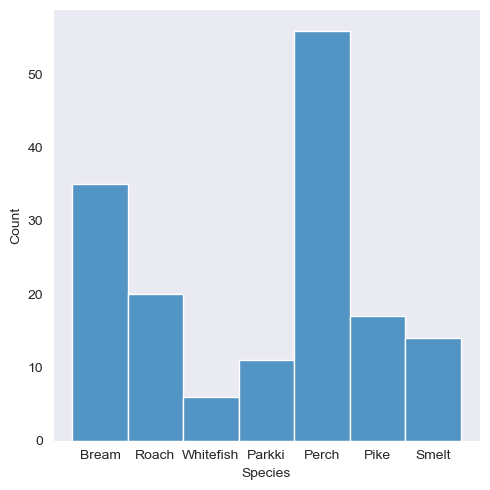

In [22]:
sb.set_style('dark')
plt.figure(figsize=(15,8))
sb.displot(mydata['Species'])

<span style="font-size: larger;">**Data Preprocessing**.</span>


<span style="font-size: larger;">**Dummy Variables are created for the categorical column "Species"**.</span>


In [29]:
newd=ps.get_dummies(mydata['Species'],drop_first=True)

In [30]:
finaldata=ps.concat([mydata,newd],axis=1)

In [31]:
finaldata

,Species,Weight,Length1,Length2,Length3,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,1,0
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,1,0
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,1,0


In [33]:
finaldata.drop('Species',axis=1)

,Weight,Length1,Length2,Length3,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,1,0


In [35]:
#sb.pairplot(finaldata)

<span style="font-size: larger;">**When the independent variables are plotted against target variable the resultant plot did not showed up the regression relation and the same with log function so Sqrt is used**.</span>


<Axes: xlabel='Length1', ylabel='Weight'>

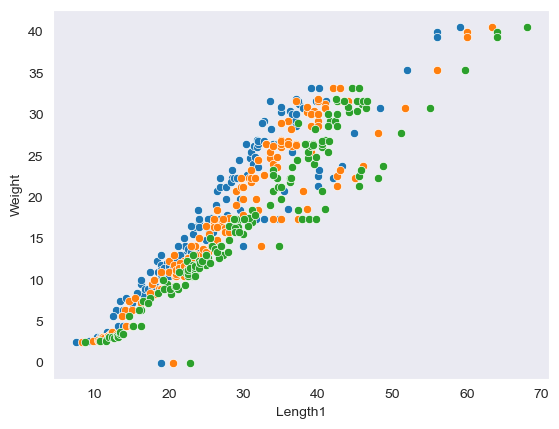

In [49]:
sb.scatterplot(x=('Length1'),y=np.sqrt(finaldata['Weight']),data=finaldata)
sb.scatterplot(x='Length2',y=np.sqrt(finaldata['Weight']),data=finaldata)
sb.scatterplot(x='Length3',y=np.sqrt(finaldata['Weight']),data=finaldata)

In [66]:
finaldata['sqrtweights']=np.sqrt(finaldata['Weight'])

In [74]:
finaldata.drop('Weight',axis=1,inplace=True)
finaldata.drop('Species',axis=1,inplace=True)

In [79]:
finaldata

,Length1,Length2,Length3,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish,sqrtweights
0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0,15.556349
1,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0,17.029386
2,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0,18.439089
3,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0,19.052559
4,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0,20.736441
...,...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0,3.492850
155,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,1,0,3.660601
156,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,1,0,3.492850
157,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,1,0,4.438468


<span style="font-size: larger;">**Scaling the independent Variables as their range is not similar to each other**.</span>


In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
sc=StandardScaler()

In [103]:
finaldata[['length1','length2','length3','heigth','width']]=sc.fit_transform(finaldata[['Length1','Length2','Length3','Height','Width']])

In [130]:
finaldata1=finaldata.drop('Length1',axis=1,inplace=True)

In [136]:
finaldata1=finaldata.drop('Length2',axis=1,inplace=True)

In [137]:
finaldata1=finaldata.drop('Length3',axis=1,inplace=True)

In [138]:
finaldata1=finaldata.drop('Height',axis=1,inplace=True)

In [139]:
finaldata1=finaldata.drop('Width',axis=1,inplace=True)

In [144]:
finaldata

,Parkki,Perch,Pike,Roach,Smelt,Whitefish,sqrtweights,length1,length2,length3,heigth,width
0,0,0,0,0,0,0,15.556349,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,0,0,0,0,0,0,17.029386,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,0,0,0,0,0,0,18.439089,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,0,0,0,0,0,0,19.052559,0.005302,0.054694,0.196390,0.879771,0.022621
4,0,0,0,0,0,0,20.736441,0.025372,0.054694,0.239592,0.812835,0.426371
...,...,...,...,...,...,...,...,...,...,...,...,...
154,0,0,0,0,1,0,3.492850,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403
155,0,0,0,0,1,0,3.660601,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547
156,0,0,0,0,1,0,3.492850,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402
157,0,0,0,0,1,0,4.438468,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568


<span style="font-size: larger;">**Training and Testing the Model**.</span>


In [142]:
from sklearn.model_selection import train_test_split

In [145]:
X=finaldata.drop('sqrtweights',axis=1)
y=finaldata['sqrtweights']

In [146]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
lr=LinearRegression()

In [149]:
lr.fit(X_train,y_train)

LinearRegression()

In [162]:
pred=lr.predict(X_test)

<span style="font-size: larger;">**Model Validation**.</span>


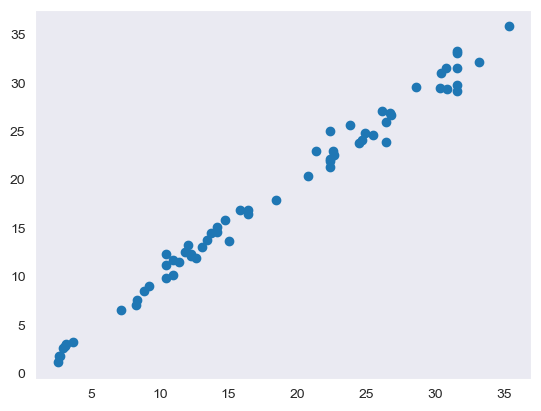

In [161]:
plt.scatter(y_test,lr.predict(X_test))

<span style="font-size: larger;">**Looking At the Stats**.</span>


In [152]:
lr.coef_

array([ 2.37740837,  1.99387117, -2.11962467,  0.19381773,  3.20647347,
        1.84336104,  2.63237845, -3.83828842,  8.40135429,  1.12172535,
        2.12795526])

In [153]:
lr.intercept_

16.677204006114806

In [154]:
X_train.columns

Index(['Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish', 'length1',
       'length2', 'length3', 'heigth', 'width'],
      dtype='object')

In [158]:
Coefficienteffect=ps.DataFrame(lr.coef_,X_train.columns,columns=['coef'])

In [159]:
Coefficienteffect

,coef
Parkki,2.377408
Perch,1.993871
Pike,-2.119625
Roach,0.193818
Smelt,3.206473
Whitefish,1.843361
length1,2.632378
length2,-3.838288
length3,8.401354
heigth,1.121725


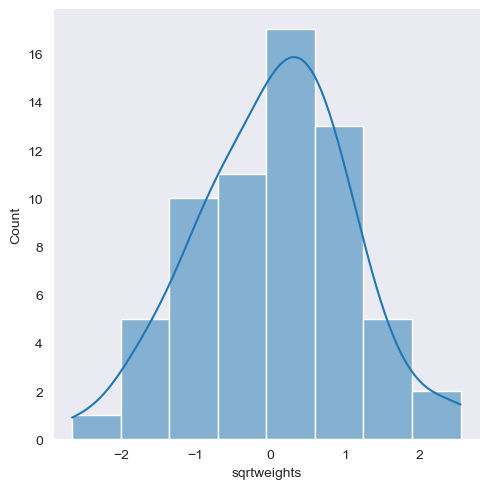

In [164]:
sb.displot((y_test-pred),kde=True)